In [1]:
import sklearn

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np



### Example in regression using SGDRegressor

In [3]:
X=np.random.uniform(-1,1,size=[200])
y=X+0.1*np.random.normal(size=200)
X[-1]=10
X=X.reshape(-1,1)
y[-1]=-1
perm=np.random.permutation(len(X))
X=X[perm]
y=y[perm]

/home/mathieu/scikit/scikit-learn/sklearn/robust/RobustWeightedEstimator.py:101: UserWarning: RobustWeightedEstimator: No loss function given. Using square loss function for regression.
  warnings.warn("RobustWeightedEstimator: No loss"


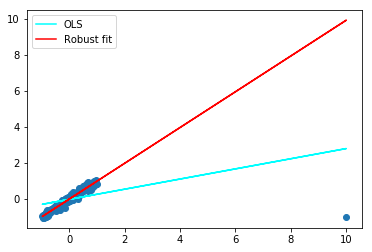

In [4]:
from sklearn.linear_model import SGDRegressor
reg1=SGDRegressor()
reg1.fit(X,y)
plt.scatter(X,y)
plt.plot(X,reg1.predict(X),label='OLS',c="cyan")

from sklearn.robust.RobustWeightedEstimator import RobustWeightedEstimator
# Robust estimator using median of means weight. Huber loss weight are also available.

reg2=RobustWeightedEstimator(base_estimator=SGDRegressor(),max_iter=100,weighting='mom',K=3)
reg2.fit(X,y)

plt.plot(X,reg2.predict(X),label='Robust fit',c='red')
plt.legend()
plt.show()

### Example in Classification using SGDClassifier

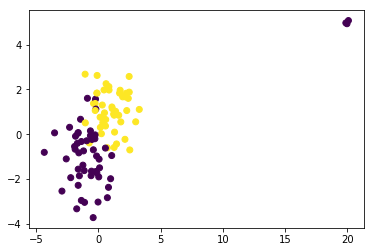

In [11]:
X,y=make_blobs(n_samples=100,centers=np.array([[-1,-1],[1,1]]))
for f in range(3):
    X[f]=[20,5]+np.random.normal(size=2)*0.1
    y[f]=0
perm=np.random.permutation(len(X))
X=X[perm]
y=y[perm]
plt.scatter(X[:,0],X[:,1],c=y)

In [12]:
def plot_classif(clf,X,y):
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = .02  # step size in the mesh
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure(1, figsize=(4, 3))
    plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)
    plt.scatter(X[:,0],X[:,1],c=y)

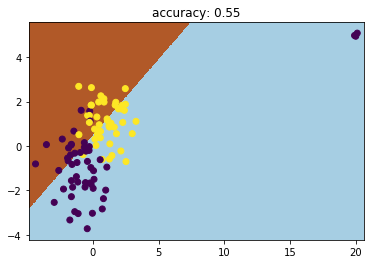

In [13]:
from sklearn.linear_model import SGDClassifier
clf=SGDClassifier()
clf.fit(X,y)
plt.scatter(X[:,0],X[:,1],c=y)
plot_classif(clf,X,y)
plt.title('accuracy: '+str(np.mean(y==clf.predict(X))))
plt.show()

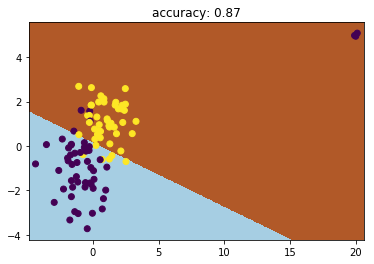

In [14]:
from sklearn.robust.RobustWeightedEstimator import RobustWeightedEstimator
# Robust estimator using median of means weight. Huber loss weight are also available.

clf=RobustWeightedEstimator(base_estimator=SGDClassifier(),max_iter=200,weighting='mom',K=13,loss='hinge')
clf.fit(X,y)
plt.scatter(X[:,0],X[:,1],c=y)
plot_classif(clf,X,y)
plt.title('accuracy: '+str(np.mean(y==clf.predict(X))))
plt.show()

### Example MLP

In [15]:
X=np.random.uniform(-1,1,size=[200])
y=X+0.1*np.random.normal(size=200)
X[-1]=10
X=X.reshape(-1,1)
y[-1]=-1
perm=np.random.permutation(len(X))
X=X[perm]
y=y[perm]

In [16]:
from sklearn.neural_network import MLPRegressor
reg1=MLPRegressor(max_iter=300)
reg1.fit(X,y)

base_est=MLPRegressor()
reg2=RobustWeightedEstimator(base_estimator=base_est,max_iter=300,weighting='mom',K=5)
reg2.fit(X,y)

/home/mathieu/scikit/scikit-learn/sklearn/robust/RobustWeightedEstimator.py:101: UserWarning: RobustWeightedEstimator: No loss function given. Using square loss function for regression.
  warnings.warn("RobustWeightedEstimator: No loss"


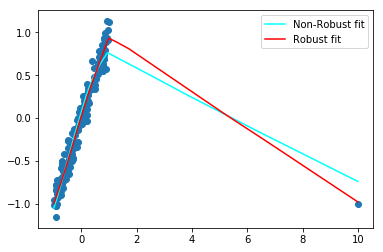

In [17]:
plt.scatter(X,y)
xplot=np.linspace(-1,10,1000)
yplot1=reg1.predict(xplot.reshape(-1,1))

yplot2=reg2.predict(xplot.reshape(-1,1))
plt.plot(xplot,yplot1,label='Non-Robust fit',c='cyan')

plt.plot(xplot,yplot2,label='Robust fit',c='r')
plt.legend()
plt.show()